In [ ]:
!pip install matplotlib seaborn scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv("search_engine_data.csv")
print(data.head())
print(data.info())


      Date  Google  bing  Yahoo!  Baidu  YANDEX  YANDEX RU  Ask Jeeves  \
0  2009-01   90.25   0.0    5.91   0.00     0.0       0.16        0.40   
1  2009-02   89.69   0.0    5.74   0.00     0.0       0.19        0.39   
2  2009-03   89.14   0.0    6.01   0.21     0.0       0.18        0.41   
3  2009-04   89.91   0.0    5.47   0.22     0.0       0.20        0.37   
4  2009-05   89.86   0.0    5.25   0.38     0.0       0.21        0.40   

   DuckDuckGo  Naver  ...  Mail.ru  Ecosia  Webcrawler  Daum  CocCoc  \
0         0.0   0.00  ...      0.0     0.0        0.00   0.0     0.0   
1         0.0   0.01  ...      0.0     0.0        0.00   0.0     0.0   
2         0.0   0.01  ...      0.0     0.0        0.01   0.0     0.0   
3         0.0   0.02  ...      0.0     0.0        0.04   0.0     0.0   
4         0.0   0.02  ...      0.0     0.0        0.04   0.0     0.0   

   StartPagina (Google)  AVG Search  SweetIM  Windows Live  Other  
0                  0.07         0.0      0.0          

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Total_Popularity'] = data.iloc[:, :].sum(axis=1)

print(data[['Total_Popularity']].head())


            Total_Popularity
Date                        
2009-01-01            100.01
2009-02-01            100.00
2009-03-01            100.00
2009-04-01             99.99
2009-05-01            100.01


In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data['Total_Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (152, 27)
Testing set size: (38, 27)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.01298547771858165
R² Score: -0.1399395131142931


In [ ]:
data['Year'] = data.index.year
yearly_popularity = data.groupby('Year').sum()
print(yearly_popularity.head())


       Google   bing  Yahoo!  Baidu  YANDEX  YANDEX RU  Ask Jeeves  \
Year                                                                 
2009  1081.79  23.05   59.73   3.86    0.00       2.42        4.33   
2010  1090.69  41.54   47.38   4.06    0.00       3.25        4.89   
2011  1092.83  42.84   43.06   3.83    0.00       3.58        4.15   
2012  1102.04  37.06   36.06   4.27    0.52       4.03        3.64   
2013  1082.87  40.40   37.46  10.46    2.99       4.06        3.47   

      DuckDuckGo  Naver   AOL  ...  Ecosia  Webcrawler  Daum  CocCoc  \
Year                           ...                                     
2009        0.00   0.19  4.67  ...     0.0        0.29  0.00     0.0   
2010        0.00   1.74  3.18  ...     0.0        0.36  0.17     0.0   
2011        0.00   3.07  2.48  ...     0.0        0.18  0.31     0.0   
2012        0.05   0.40  2.04  ...     0.0        0.14  0.21     0.0   
2013        0.15   1.56  1.93  ...     0.0        0.73  0.29     0.0   

    

In [ ]:
most_popular_per_year = yearly_popularity.idxmax(axis=1)
popularity_scores = yearly_popularity.max(axis=1)
result = pd.DataFrame({
    'Year': yearly_popularity.index,
    'Most_Popular_Search_Engine': most_popular_per_year,
    'Popularity_Score': popularity_scores
})

print(result)


      Year Most_Popular_Search_Engine  Popularity_Score
Year                                                   
2009  2009           Total_Popularity           1199.95
2010  2010           Total_Popularity           1200.02
2011  2011           Total_Popularity           1199.98
2012  2012           Total_Popularity           1199.87
2013  2013           Total_Popularity           1199.89
2014  2014           Total_Popularity           1200.07
2015  2015           Total_Popularity           1200.04
2016  2016           Total_Popularity           1199.88
2017  2017           Total_Popularity           1199.99
2018  2018           Total_Popularity           1199.90
2019  2019           Total_Popularity           1199.90
2020  2020           Total_Popularity           1199.91
2021  2021           Total_Popularity           1199.89
2022  2022           Total_Popularity           1199.95
2023  2023           Total_Popularity           1199.92
2024  2024           Total_Popularity           

In [ ]:
data['Year'] = data.index.year


In [ ]:
search_engine_yearly_popularity = data.groupby('Year').sum()

search_engine_yearly_popularity = search_engine_yearly_popularity.drop(columns=['Total_Popularity', 'Year'], errors='ignore')

print(search_engine_yearly_popularity.head())


       Google   bing  Yahoo!  Baidu  YANDEX  YANDEX RU  Ask Jeeves  \
Year                                                                 
2009  1081.79  23.05   59.73   3.86    0.00       2.42        4.33   
2010  1090.69  41.54   47.38   4.06    0.00       3.25        4.89   
2011  1092.83  42.84   43.06   3.83    0.00       3.58        4.15   
2012  1102.04  37.06   36.06   4.27    0.52       4.03        3.64   
2013  1082.87  40.40   37.46  10.46    2.99       4.06        3.47   

      DuckDuckGo  Naver   AOL  ...  Mail.ru  Ecosia  Webcrawler  Daum  CocCoc  \
Year                           ...                                              
2009        0.00   0.19  4.67  ...     0.00     0.0        0.29  0.00     0.0   
2010        0.00   1.74  3.18  ...     0.00     0.0        0.36  0.17     0.0   
2011        0.00   3.07  2.48  ...     0.00     0.0        0.18  0.31     0.0   
2012        0.05   0.40  2.04  ...     0.00     0.0        0.14  0.21     0.0   
2013        0.15   1.56

In [ ]:
most_popular_per_year = search_engine_yearly_popularity.idxmax(axis=1)
popularity_scores = search_engine_yearly_popularity.max(axis=1)

result = pd.DataFrame({
    'Year': search_engine_yearly_popularity.index,
    'Most_Popular_Search_Engine': most_popular_per_year,
    'Popularity_Score': popularity_scores
})

print(result)


      Year Most_Popular_Search_Engine  Popularity_Score
Year                                                   
2009  2009                     Google           1081.79
2010  2010                     Google           1090.69
2011  2011                     Google           1092.83
2012  2012                     Google           1102.04
2013  2013                     Google           1082.87
2014  2014                     Google           1077.76
2015  2015                     Google           1087.27
2016  2016                     Google           1104.01
2017  2017                     Google           1104.67
2018  2018                     Google           1096.71
2019  2019                     Google           1111.56
2020  2020                     Google           1105.00
2021  2021                     Google           1104.17
2022  2022                     Google           1104.90
2023  2023                     Google           1108.27
2024  2024                     Google           

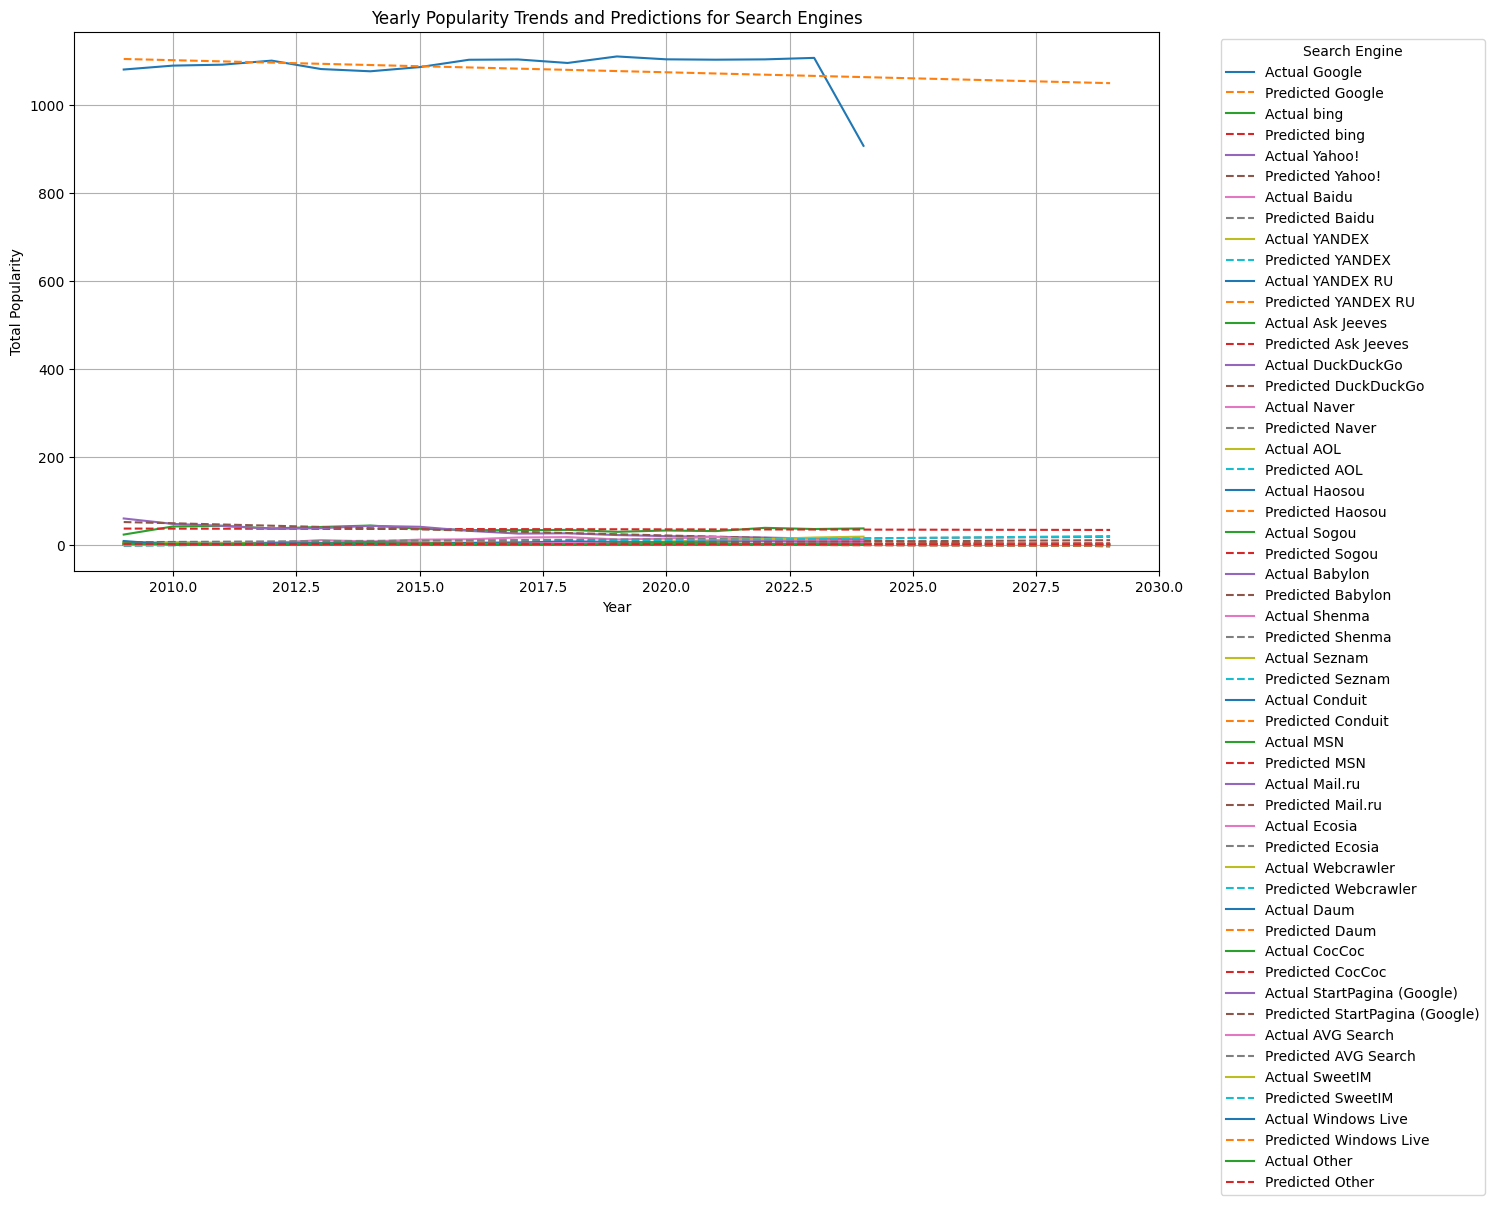

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

plt.figure(figsize=(14, 7))

for column in search_engine_yearly_popularity.columns:
    X = search_engine_yearly_popularity.index.values.reshape(-1, 1)
    y = search_engine_yearly_popularity[column].values

    plt.plot(X, y, label=f"Actual {column}")

    model = LinearRegression()
    model.fit(X, y)

    future_years = np.arange(X.min(), X.max() + 6).reshape(-1, 1)
    y_pred = model.predict(future_years)

    plt.plot(future_years, y_pred, linestyle='--', label=f"Predicted {column}")

plt.title("Yearly Popularity Trends and Predictions for Search Engines")
plt.xlabel("Year")
plt.ylabel("Total Popularity")
plt.legend(title="Search Engine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()
